In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Idea del analisis: cuantas menos palabras repetidas tiene un texto, mejor esta escrito (utilizacion de sinonimos), lo que puede significar q la persona q lo escribió tiene un minimo nivel académico y su tweet es mas probable q sea real

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 1ro distribucion de cantidad de palabras por tweet

In [3]:
df['words_count'] = df['text'].apply(lambda x: len(str(x).split()))

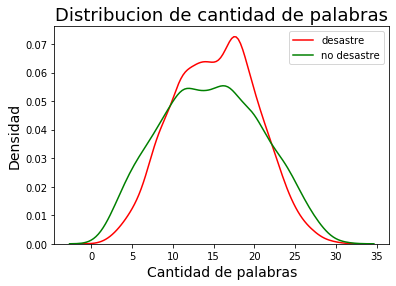

In [6]:
g = sns.distplot(df[df['target'] == 1]['words_count'], color = 'red', label = 'desastre', hist=False)
g = sns.distplot(df[df['target'] == 0]['words_count'], color = 'green', label = 'no desastre', hist=False)
g.set_title("Distribucion de cantidad de palabras", fontsize=18)
g.set_ylabel("Densidad", fontsize=14)
g.set_xlabel("Cantidad de palabras", fontsize=14)
g.get_figure().savefig('imgs/words_count_distribution.png')

### la distribucion de ambas es la normal, para los tweets sobre desastres reales la varianza es menor. A simple vista el valor medio para desastres reales parece ser apenas mayor y con un valor cercano a 17 (luego será analizado)

## 3do distribucion de cantidad de palabras unicas por tweet

In [7]:
df['unique_words_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
df

,id,keyword,location,text,target,words_count,unique_words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,17
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,19


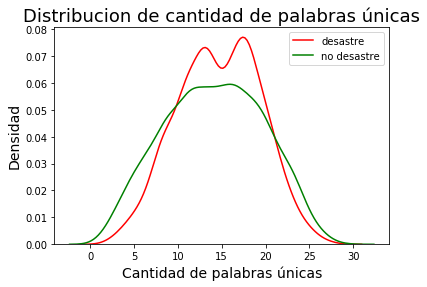

In [8]:
g = sns.distplot(df[df['target'] == 1]['unique_words_count'], color = 'red', label = 'desastre', hist=False)
g = sns.distplot(df[df['target'] == 0]['unique_words_count'], color = 'green', label = 'no desastre', hist=False)
g.set_title("Distribucion de cantidad de palabras únicas", fontsize=18)
g.set_ylabel("Densidad", fontsize=14)
g.set_xlabel("Cantidad de palabras únicas", fontsize=14)
g.get_figure().savefig('imgs/unique_words_count_distribution.png')

### se observan valores de densidad similares a los de words count, se podria decir q la mayoria de las palabras en los tweets son unicas, la comprobacion:

In [11]:
df['unique_words_percentage'] = (df['unique_words_count'] / df['words_count']) * 100

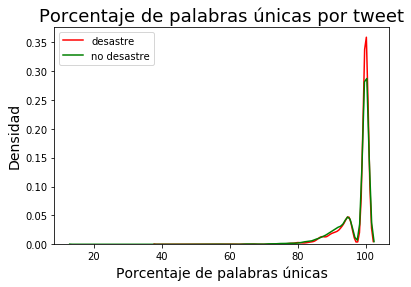

In [12]:
g = sns.distplot(df[df['target'] == 1]['unique_words_percentage'], color = 'red', label = 'desastre', hist=False)
g = sns.distplot(df[df['target'] == 0]['unique_words_percentage'], color = 'green', label = 'no desastre', hist=False)
g.set_title("Porcentaje de palabras únicas por tweet", fontsize=18)
g.set_ylabel("Densidad", fontsize=14)
g.set_xlabel("Porcentaje de palabras únicas", fontsize=14)
g.get_figure().savefig('imgs/unique_words_percentage_distribution.png')

### se cumple lo que se predijo. sin embargo la idea del analisis termina siendo falsa, la cantidad de palabras únicas por tweet no sirve para determinar si un tweet es sobre un desastre verdadero o sobre un desastre falso.

## 4to verificar que la idea del analisis no es válida

In [16]:
df_unique_mean = df.groupby(['target']).agg({'unique_words_count': 'mean', 'words_count': 'mean'})
df_unique_mean

,unique_words_count,words_count
target,,
0,14.096499,14.704744
1,14.664934,15.167533


In [17]:
df_unique_mean = df_unique_mean.rename(index={0: 'no desastre', 1: 'desastre'}).reset_index()
df_unique_mean

,target,unique_words_count,words_count
0,no desastre,14.096499,14.704744
1,desastre,14.664934,15.167533


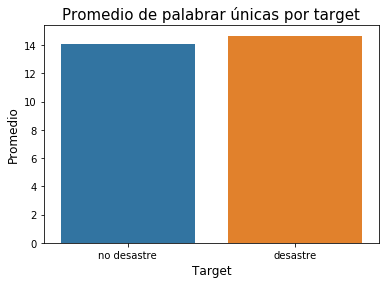

In [18]:
g = sns.barplot(x=df_unique_mean['target'].values, y=df_unique_mean['unique_words_count'].values, orient='v')
g.set_title("Promedio de palabrar únicas por target", fontsize=15)
g.set_xlabel("Target", fontsize=12)
g.set_ylabel("Promedio", fontsize=12)
plt.show()
g.get_figure().savefig('imgs/unique_words_mean_per_target.png')

### Se cumple (por demasiado poco) que en promedio los tweets sobre desastres reales tienen mayor cantidad de palabras únicas, por lo tanto la idea inicial del analisis es falsa.